# Box-Muller 变换

以标准正态分布的采样为例，设$X, Y$为两个独立分布的正态分布随机变量，其概率密度函数为

$$
f(x, y) = \frac{1}{2\pi}e^{-\frac{x^2 + y^2}{2}}
$$

转换为极坐标系，$x = r\cos\theta, y = r\sin\theta$，则有

$$
f(r, \theta) = \frac{1}{2\pi}re^{-\frac{r^2}{2}}
$$

此时，$\theta$不出现在概率密度函数中，因此$\theta$独立于$r$，且服从$[0, 2\pi)$的均匀分布。$r$的概率密度函数为$re^{-\frac{r^2}{2}}$，其CDF为

$$
F(r) = \int_0^r te^{-\frac{t^2}{2}}dt = 1 - e^{-\frac{r^2}{2}}
$$

$F(r)$的逆为

$$
F^{-1}(p) = \sqrt{-2\log(1 - p)}
$$

因此，我们可以从$U(0, 2\pi)$中采样$\theta$，从$U(0, 1)$中采样$p$，然后通过$F^{-1}(p)$计算$r$，按照$x = r\cos\theta, y = r\sin\theta$计算得到$X, Y$的采样。采样结果分别服从标准正态分布。

In [1]:
import numpy as np
from matplotlib import pyplot as plt

%config InlineBackend.figure_format = 'svg'

In [2]:
theta = np.random.uniform(0, 2*np.pi, 1000)
p = np.random.uniform(0, 1, 1000)

r = np.sqrt(-2 * np.log(1 - p))
x = r * np.cos(theta)
y = r * np.sin(theta)

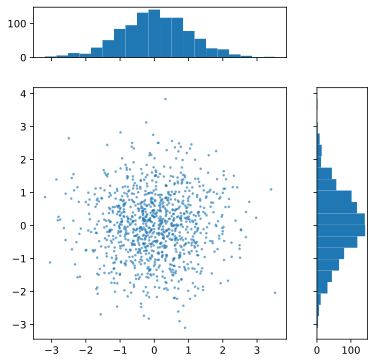

In [3]:
fig, ax = plt.subplots(
    2, 2, figsize=(6, 6),
    width_ratios=[5, 1], height_ratios=[1, 5],
    sharex='col', sharey='row'
)
ax[0][1].set_axis_off()
ax[0][0].hist(x, bins=20, orientation='vertical')
ax[1][1].hist(y, bins=20, orientation='horizontal')
ax[1][0].scatter(x, y, s=3, alpha=0.5)
plt.show()

通过Q-Q图可以验证生成的随机变量是否服从标准正态分布。

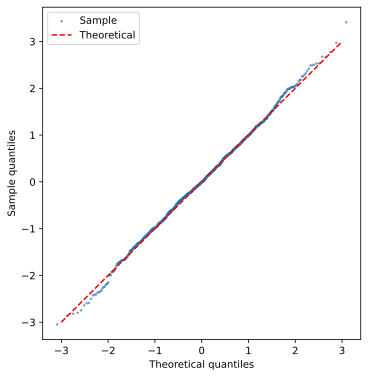

In [4]:
from scipy.stats import norm

real_norm = norm.ppf(np.linspace(0, 1, 1000))
sample_norm = np.sort(x)

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(real_norm, sample_norm, s=3, alpha=0.5, label='Sample')
ax.plot([-3, 3], [-3, 3], color='red', linestyle='--', label='Theoretical')
ax.set_xlabel('Theoretical quantiles')
ax.set_ylabel('Sample quantiles')
ax.legend()
ax.set_aspect('equal')
plt.show()